In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Read data from csv file
df = pd.read_csv('DS1_50.csv')
df_test = pd.read_csv('DS1_1000.csv') # (Unealistically big) test data for reliable evaluation 

Goals:
1. Predict column y from the other variables
2. Understand thre relationships between the variables, in particular which variables are relevant for predicting y. 
3. Get some understanding of the reliability of our model and of our conclusions 

#### Some commands to get a first overview

In [3]:
df.head() # First few lines

,x0,x1,x2,x3,article,y
0,129.910247,-174.295634,-0.148489,0.135006,L134QS,9.730587
1,131.935903,34.767800,0.759396,0.675498,M145RS,10.186560
2,105.054164,-102.154750,0.016013,-0.637706,Q243RA,9.427848
3,35.044431,-103.234909,0.726942,-1.651440,L134QS,7.033332
4,130.000460,-61.448860,0.311692,-1.395062,L134QS,8.096095


In [4]:
df.describe()  # Some basic statistics

,x0,x1,x2,x3,y
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,5.346166,-5.059545,-0.101508,-0.080933,8.174491
std,101.545227,106.725998,0.989033,1.664660,2.801625
min,-204.180745,-174.295634,-2.185873,-3.390625,3.452492
25%,-60.869652,-101.458428,-0.891850,-1.386011,5.867845
50%,10.215235,-18.157560,-0.036398,-0.167336,7.938910
75%,70.870635,76.284066,0.604894,1.422209,9.951101
max,207.489848,331.991841,2.015776,2.989260,15.675836


In [5]:
df.info() # Some basic info about ndata types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x0       50 non-null     float64
 1   x1       50 non-null     float64
 2   x2       50 non-null     float64
 3   x3       50 non-null     float64
 4   article  50 non-null     object 
 5   y        50 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB


In [6]:
df.dtypes # even more basic info about data types

x0         float64
x1         float64
x2         float64
x3         float64
article     object
y          float64
dtype: object

In [7]:
df.columns

Index(['x0', 'x1', 'x2', 'x3', 'article', 'y'], dtype='object')

#### Make separate variables for each column for convenience

In [8]:
x0 = df['x0']
x1 = df['x1']
x2 = df['x2']
x3 = df['x3']
article = df['article']
y = df['y']

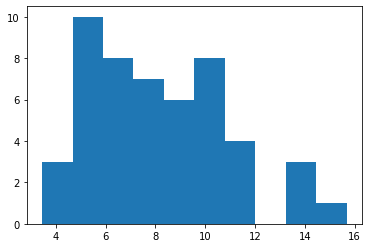

In [9]:
plt.hist(y, bins=10);

#### For taking a look at the relationships

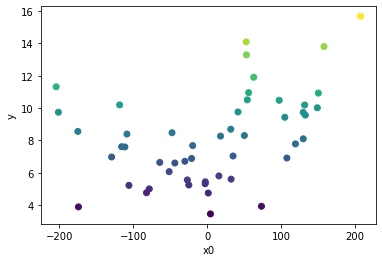

In [10]:
plt.scatter(x0,y,c=(y-min(df['y'])+1)) # scatterplot of x0 against y where the color represents y 
plt.xlabel('x0')
plt.ylabel('y');

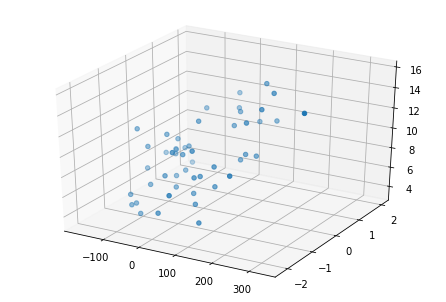

In [11]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random


fig = pyplot.figure()
ax = Axes3D(fig)


ax.scatter(x1, x2, y)
pyplot.show()

In [12]:
# Such charts also exist in an interactive mode:
# See https://github.com/matplotlib/jupyter-matplotlib
# and instructions at 
# https://ilias.hs-karlsruhe.de/goto.php?target=file_364991_download&client_id=HSKA 

In [13]:
df.columns

Index(['x0', 'x1', 'x2', 'x3', 'article', 'y'], dtype='object')

#### All pairwise relationships in one: Correlation Matrix

x0    0.410936
x1    0.552432
x2    0.458730
x3    0.783288
y     1.000000
Name: y, dtype: float64

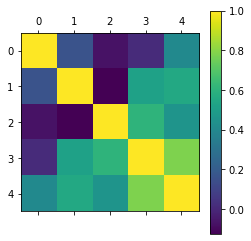

In [14]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())
plt.colorbar()
df.corr()['y']

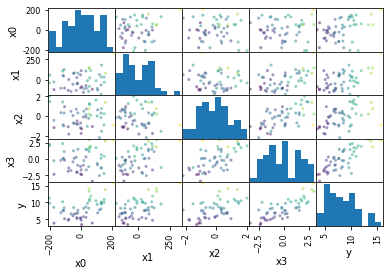

In [15]:
pd.plotting.scatter_matrix(df, c=df["y"]);

In [16]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
X = df[df.columns.difference(['y','article'])] # Remove columns 'y' and 'article'
Y = df['y']
X_test = df_test[df.columns.difference(['y','article'])]
Y_test = df_test['y']

In [17]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)
pred = regr.predict(X)
pred_test = regr.predict(X_test)
print(X.columns.values)
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('On Training set:')
print("Mean squared error: %.2f" % mean_squared_error(Y, pred))
print("Variance of target variable: %.2f" % np.var(Y))
print('Variance explained: %.2f' % r2_score(Y, pred))
print('On Test set:')
print("Mean squared error: %.2f" % mean_squared_error(Y_test, pred_test))
print("Variance of target variable: %.2f" % np.var(Y_test))
print('Variance explained: %.2f' % r2_score(Y_test, pred_test))

['x0' 'x1' 'x2' 'x3']
Coefficients: 
 [0.01045065 0.00589512 0.49764372 0.93225147]
Intercept: 
 8.274411247664181
On Training set:
Mean squared error: 1.58
Variance of target variable: 7.69
Variance explained: 0.79
On Test set:
Mean squared error: 3.42
Variance of target variable: 6.98
Variance explained: 0.51


In [18]:
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     43.41
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           6.74e-15
Time:                        09:10:09   Log-Likelihood:                -82.432
No. Observations:                  50   AIC:                             174.9
Df Residuals:                      45   BIC:                             184.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2744      0.190     43.507      0.0

In [19]:
# You can gnore the subsequent PCA for the moment, we will look at this later:

In [20]:
# PCA:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [21]:
print(pca.components_) # The principal component vectors
print(pca.explained_variance_ratio_)

[[ 5.94259066e-01  8.04250654e-01 -1.15863505e-03  5.97543743e-03]
 [-8.04272671e-01  5.94231322e-01 -2.35540465e-04  5.87806102e-03]]
[0.58461578 0.41524751]


In [22]:
pd.DataFrame(pca.transform(X)).head()

,0,1
0,-62.083556,-200.747591
1,107.261789,-78.141766
2,-18.839964,-137.892730
3,-61.319482,-82.233807
4,28.717469,-133.772161
